In [176]:
import pandas as pd


In [177]:
df = pd.read_csv('dataset/preprocessed_datas_kdd_outlier_removed.csv')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062223 entries, 0 to 4062222
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   class          float64
 1   count          float64
 2   dst_bytes_log  float64
 3   duration_log   float64
 4   protocol_type  float64
 5   service        float64
 6   src_bytes_log  float64
 7   srv_count      float64
dtypes: float64(8)
memory usage: 247.9 MB


In [179]:
df.isna().sum()

class                 0
count            686448
dst_bytes_log    686448
duration_log          0
protocol_type         0
service               0
src_bytes_log    686448
srv_count        686448
dtype: int64

In [180]:
df = df.dropna()

In [181]:
df.isna().sum()

class            0
count            0
dst_bytes_log    0
duration_log     0
protocol_type    0
service          0
src_bytes_log    0
srv_count        0
dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3375775 entries, 0 to 3375774
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   class          float64
 1   count          float64
 2   dst_bytes_log  float64
 3   duration_log   float64
 4   protocol_type  float64
 5   service        float64
 6   src_bytes_log  float64
 7   srv_count      float64
dtypes: float64(8)
memory usage: 231.8 MB


In [183]:
df.head()

,class,count,dst_bytes_log,duration_log,protocol_type,service,src_bytes_log,srv_count
0,1.0,0.653946,0.0,0.0,2.0,12.0,0.682,0.684177
1,1.0,0.653946,0.0,0.0,2.0,12.0,0.682,0.684177
2,1.0,0.653946,0.0,0.0,2.0,12.0,0.682,0.684177
3,1.0,0.653946,0.0,0.0,2.0,12.0,0.682,0.684177
4,1.0,0.653946,0.0,0.0,2.0,12.0,0.682,0.684177


In [184]:
df['class'].unique()

array([1., 0.])

<Axes: xlabel='class', ylabel='count'>

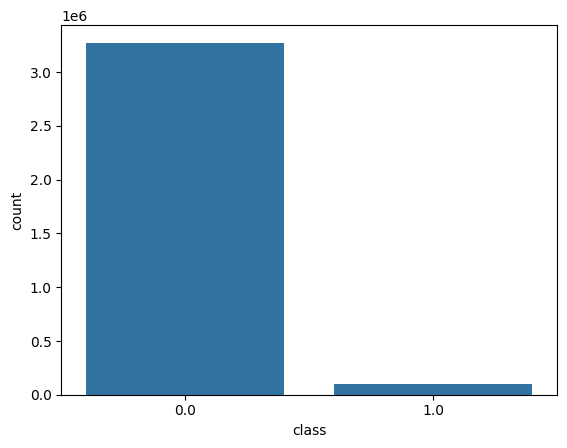

In [185]:
import seaborn as sns
sns.countplot(x=df['class'])

In [186]:
print('Class distribution Training set:')
print(df['class'].value_counts())

Class distribution Training set:
class
0.0    3273428
1.0     102347
Name: count, dtype: int64


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset (replace with your own)
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [188]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [189]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 99.62%


In [190]:
import pickle
# Save the encoder to a .pkl file
with open('model/random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(rf, file)

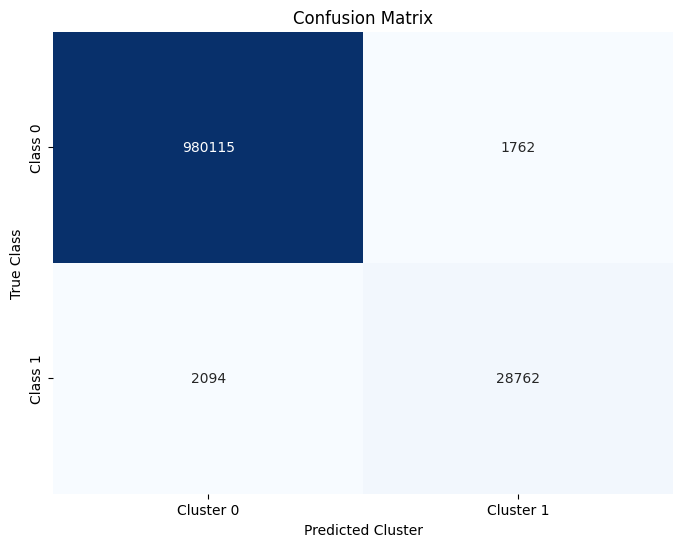

In [191]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [192]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9962
Precision: 0.9423
Recall: 0.9321
F1 Score: 0.9372

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    981877
         1.0       0.94      0.93      0.94     30856

    accuracy                           1.00   1012733
   macro avg       0.97      0.97      0.97   1012733
weighted avg       1.00      1.00      1.00   1012733



In [193]:
label = df.pop('class')

df_label = pd.DataFrame(label)

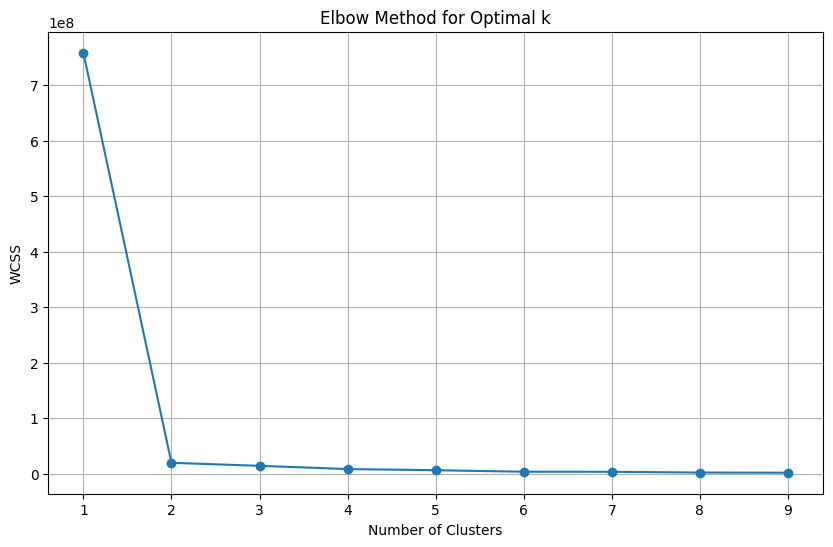

In [194]:
from sklearn.cluster import KMeans

# Range of cluster numbers to test
k_range = range(1, 10)  # Test from 1 to 10 clusters

# Calculate WCSS for each number of clusters
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS is the sum of squared distances to the nearest centroid

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [195]:

# Initialize KMeans with the number of clusters you want (e.g., 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model and predict clusters
df['cluster'] = kmeans.fit_predict(df)

In [196]:
df['cluster'].unique()

array([0, 1], dtype=int32)

In [197]:
label[0:5]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64

In [198]:
df['cluster'].head()

0    0
1    0
2    0
3    0
4    0
Name: cluster, dtype: int32

In [199]:
cluster_counts = df.groupby('cluster').size()
cluster_counts

cluster
0    2500276
1     875499
dtype: int64

In [200]:
class_count = df_label.groupby('class').size()
class_count

class
0.0    3273428
1.0     102347
dtype: int64

In [201]:
df_label.head()

,class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


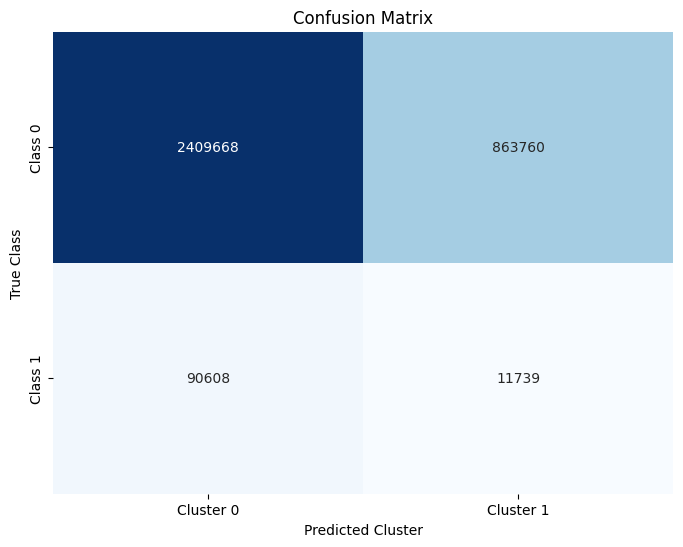

In [202]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(df_label['class'], df['cluster'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [203]:
# Calculate evaluation metrics
accuracy = accuracy_score(df_label['class'], df['cluster'])
precision = precision_score(df_label['class'], df['cluster'], average='binary')
recall = recall_score(df_label['class'], df['cluster'], average='binary')
f1 = f1_score(df_label['class'], df['cluster'], average='binary')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate classification report
print("\nClassification Report:\n", classification_report(df_label['class'], df['cluster']))

Accuracy: 0.7173
Precision: 0.0134
Recall: 0.1147
F1 Score: 0.0240

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.83   3273428
         1.0       0.01      0.11      0.02    102347

    accuracy                           0.72   3375775
   macro avg       0.49      0.43      0.43   3375775
weighted avg       0.93      0.72      0.81   3375775



In [204]:
# from sklearn.metrics import silhouette_score

# # Calculate silhouette score
# silhouette_avg = silhouette_score(df, df['cluster'])
# silhouette_avg

In [205]:
# from sklearn.metrics import davies_bouldin_score

# # Calculate Davies-Bouldin index
# db_index = davies_bouldin_score(df, df['cluster'])
# db_index

In [206]:
import pickle
# Save the encoder to a .pkl file
with open('model/kmean.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [207]:
from sklearn.mixture import GaussianMixture
gaussian_clustering = GaussianMixture(n_components=2)

# Fit the model and predict clusters
df['cluster_gauss'] = gaussian_clustering.fit_predict(df)

In [208]:
cluster_counts = df.groupby('cluster_gauss').size()
cluster_counts

cluster_gauss
0    2500276
1     875499
dtype: int64

In [209]:
class_count = df_label.groupby('class').size()
class_count

class
0.0    3273428
1.0     102347
dtype: int64

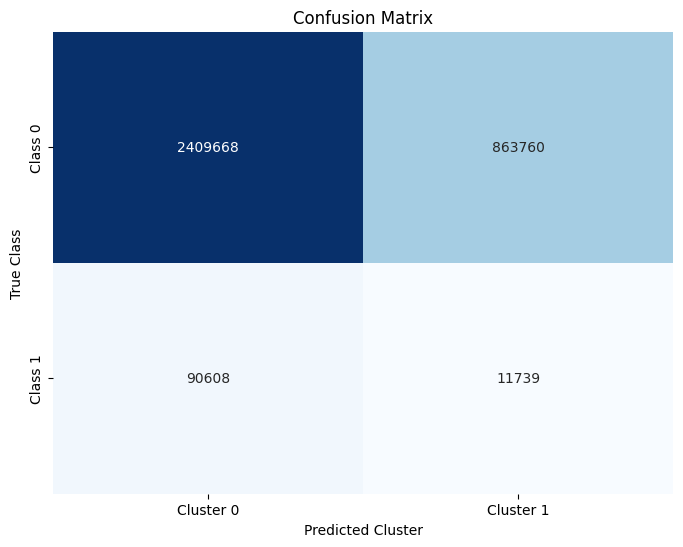

In [210]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(df_label['class'], df['cluster_gauss'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [211]:
# Calculate evaluation metrics
accuracy = accuracy_score(df_label['class'], df['cluster_gauss'])
precision = precision_score(df_label['class'], df['cluster_gauss'], average='binary')
recall = recall_score(df_label['class'], df['cluster_gauss'], average='binary')
f1 = f1_score(df_label['class'], df['cluster_gauss'], average='binary')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate classification report
print("\nClassification Report:\n", classification_report(df_label['class'], df['cluster_gauss']))

Accuracy: 0.7173
Precision: 0.0134
Recall: 0.1147
F1 Score: 0.0240

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.83   3273428
         1.0       0.01      0.11      0.02    102347

    accuracy                           0.72   3375775
   macro avg       0.49      0.43      0.43   3375775
weighted avg       0.93      0.72      0.81   3375775



In [212]:
# from sklearn.metrics import silhouette_score

# # Calculate silhouette score
# silhouette_avg = silhouette_score(df, df['cluster_gauss'])
# silhouette_avg

In [213]:
# from sklearn.metrics import davies_bouldin_score

# # Calculate Davies-Bouldin index
# db_index = davies_bouldin_score(df, df['cluster_gauss'])
# db_index


In [214]:
import pickle
# Save the encoder to a .pkl file
with open('model/gaussian.pkl', 'wb') as file:
    pickle.dump(gaussian_clustering, file)